In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from IPython.core.pylabtools import figsize

In [2]:
#******************************************************************************
# Generate data from MVN; two classes, two features, non-linear separation

#******* Class I Parameters***********
# Class I data is generated from two different MVNs
#******* Class I Parameters***********
muC1 = [0, 2, 3, 4];

# Correlation matrix, must be symmetric; the diagonal elements take values 1.0
# and the off-diagonal elements take values in the range [-1.0, 1.0].
corC1 = [(1.0, 0.1, 0.1, 0.9),
         (0.1, 1.0, 0.5, 0.8),
         (0.1, 0.5, 1.0, 0.0),
         (0.9, 0.8, 0.0, 1.0)];

In [3]:
#***********************************
# Compute covariance matrix

# This is where you would select sigmas (standard deviation) for each feature.
DG = np.diag([1, 1.6, 2.2, 3.5])

temp = np.matmul(DG, corC1)
covC1 = np.matmul(temp, DG)


In [4]:
#******* Class II Parameters ***********
muC2 = [0, -2, -3, -4];

# Correlation matrix, must be symmetric; the diagonal elements take values 1.0
# and the off-diagonal elements take values in the range [-1.0, 1.0].
corC2 = [(1.0, -0.1, -0.3, 0.4),
         (-0.1, 1.0, -0.9, -0.7),
         (-0.3, -0.9, 1.0, 0.5),
         (0.4, -0.7, 0.5, 1.0)];

#***********************************
# Compute covariance matrix

# This is where you would select sigmas (standard deviation) for each feature.
DG = np.diag([3.0, 3.0, 3.0, 3.0])

temp = np.matmul(DG, corC2)
covC2 = np.matmul(temp, DG)


In [5]:
#***********************************
# Specify sample size for each class
NSamples1 = 3000
NSamples2 = 3000
         

In [6]:
#***********************************
# Create columns, with class labels
Class1 = np.ones((NSamples1,1))
Class2 = np.full((NSamples2,1), 2)

#***********************************
# Generate samples, and put it in a dataframe
data1 = np.random.multivariate_normal(muC1, covC1, NSamples1)
Cdata1 = np.c_[data1, Class1]

df1 = pd.DataFrame(Cdata1, columns=["X1", "X2", "X3", "X4", "labels"])

data2 = np.random.multivariate_normal(muC2, covC2, NSamples2)
Cdata2 = np.c_[data2, Class2]

df2 = pd.DataFrame(Cdata2, columns=["X1", "X2", "X3", "X4", "labels"])

#***********************************
# Concatenate the two sets of samples
dfM = df1.append(df2, ignore_index=True)

C:\Users\jhuan\AppData\Local\Temp\ipykernel_16336\3479371768.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  data1 = np.random.multivariate_normal(muC1, covC1, NSamples1)
C:\Users\jhuan\AppData\Local\Temp\ipykernel_16336\3479371768.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfM = df1.append(df2, ignore_index=True)


<Figure size 600x600 with 0 Axes>

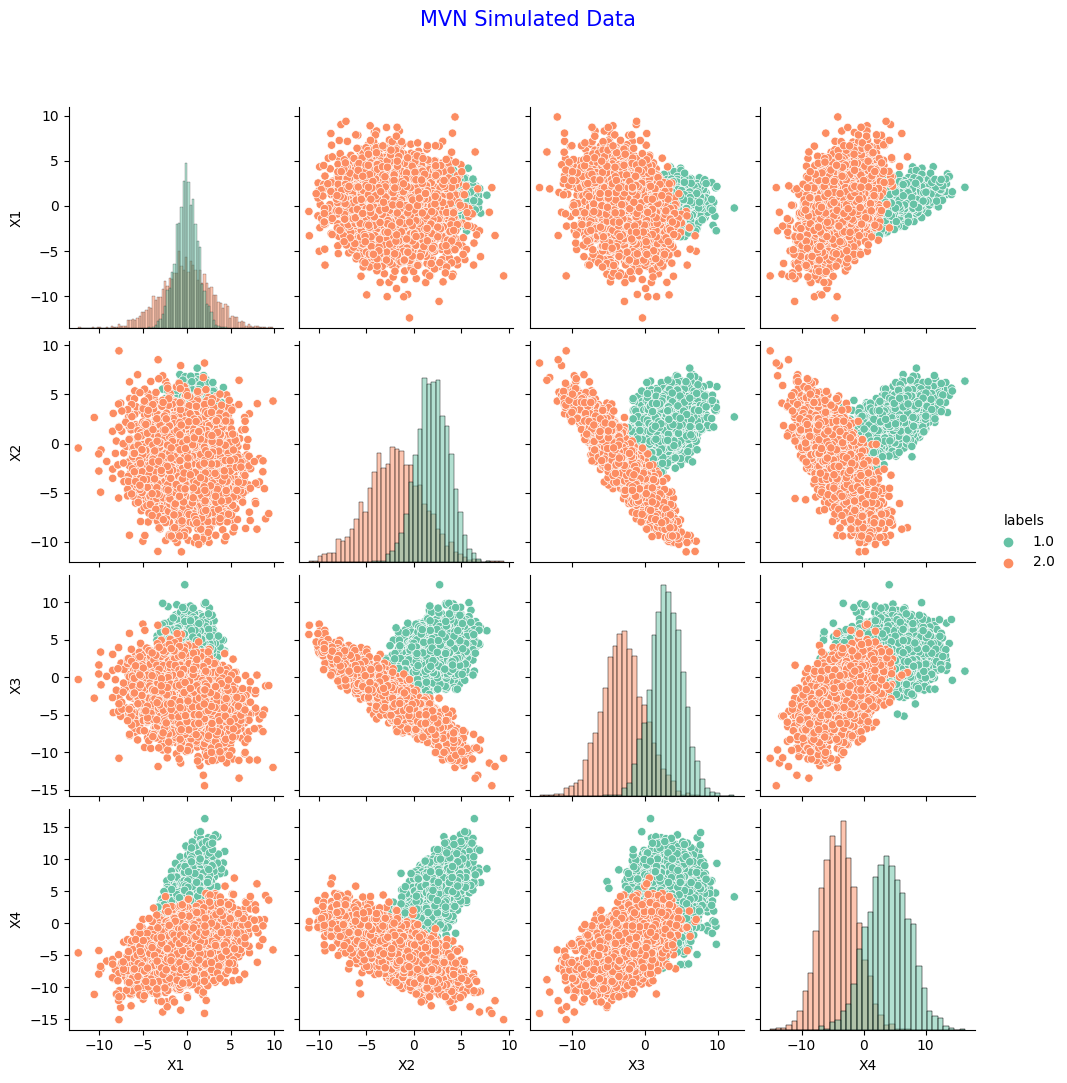

In [7]:

#****************************************
# Some plots
figsize(6,6)

#***********************************
# Pairplot
plt.figure(0)
f0 = sns.pairplot(dfM, hue="labels", palette="Set2", diag_kind="hist")
f0.fig.suptitle("MVN Simulated Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

#***********************************
# Split data into train/test set
TrainData, TestData = train_test_split(dfM, test_size=0.3, shuffle=True)

<Figure size 600x600 with 0 Axes>

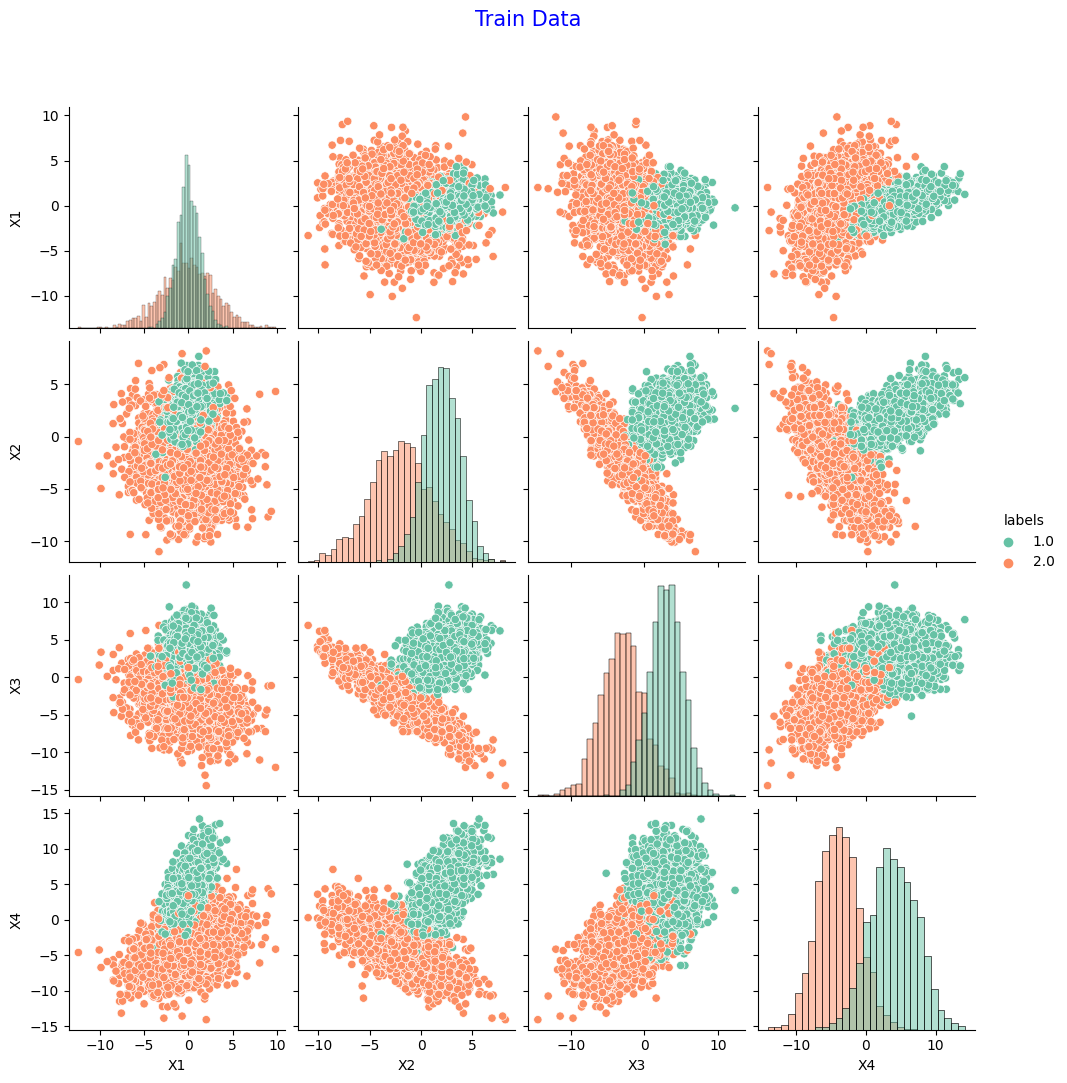

In [8]:
#***********************************
# Pairplot Train Data
plt.figure(1)
f1 = sns.pairplot(TrainData, hue="labels", palette="Set2", diag_kind="hist")
f1.fig.suptitle("Train Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

<Figure size 600x600 with 0 Axes>

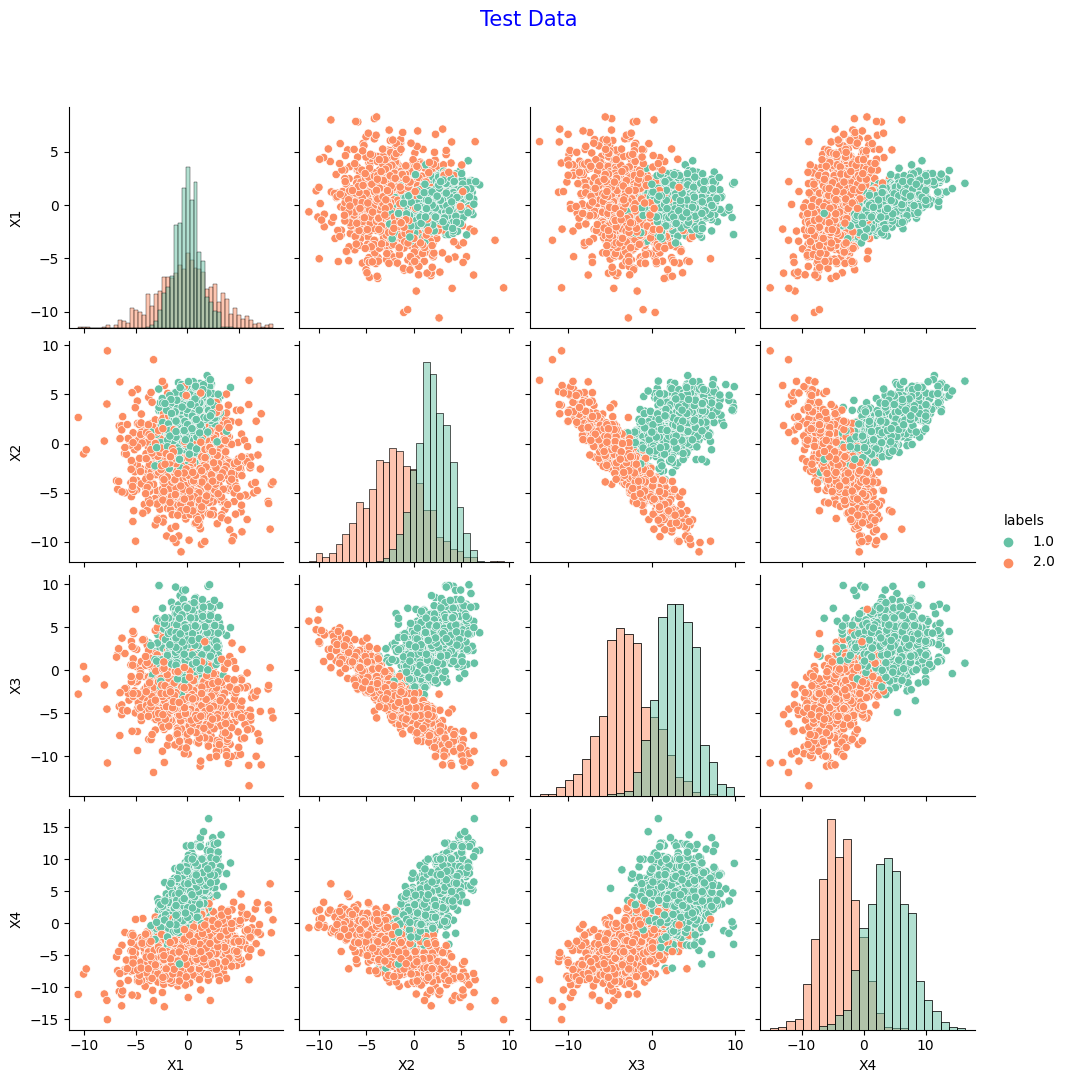

In [9]:
#***********************************
# Pairplot Test Data
plt.figure(2)
f2 = sns.pairplot(TestData, hue="labels", palette="Set2", diag_kind="hist")
f2.fig.suptitle("Test Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()


In [10]:
#***********************************
# Separate X (features) and Y (target variable)
TrainDataX = TrainData[["X1", "X2"]]
TrainDataY = TrainData["labels"]

TestDataX = TestData[["X1", "X2"]]
TestDataY = TestData["labels"]

In [11]:
#***********************************
# Naive Bayes Classification - train the classifier with the train data set
model = GaussianNB()
model.fit(TrainDataX, TrainDataY)

GaussianNB()

In [12]:
#***********************************
# Perform Prediction on Test Data; note that we use features (X) for
# prediction, and class labels (Y) for comparison.
PredictY = model.predict(TestDataX)
PredictYM = PredictY.astype(int) # convert to int, used for plot Decision Regions

# Series to array
ArrayTestX = TestDataX.to_numpy()
ArrayTestY = TestDataY.to_numpy()

In [13]:
#***********************************
# Compare predicted class labels with true class labels
print('True Class Labels')
print(ArrayTestY)
print("\n")

print('Predicted Class Labels')
print(PredictY)
print("\n")

# Print confusion matrix
CF = confusion_matrix(ArrayTestY, PredictY)
print("Confusion Matrix Test Set")
print(CF)
print("\n")

# Print classification report
CP = classification_report(ArrayTestY, PredictY)
print(CP)


True Class Labels
[2. 2. 2. ... 2. 2. 1.]


Predicted Class Labels
[2. 2. 2. ... 2. 2. 1.]


Confusion Matrix Test Set
[[821  79]
 [177 723]]


              precision    recall  f1-score   support

         1.0       0.82      0.91      0.87       900
         2.0       0.90      0.80      0.85       900

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



C:\Users\jhuan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


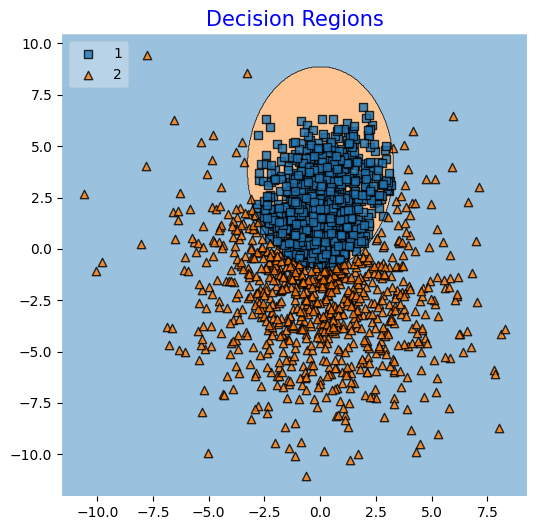

In [14]:
#***********************************
# Plot Decision Regions for Test Data
plt.figure(3)
plot_decision_regions(ArrayTestX, PredictYM, clf=model, legend=2)
plt.title("Decision Regions", color='#0000ff', fontsize=15)
plt.show()